In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sci378 import *

Version:  0.0.19


In [3]:
data=array([7,9])

In [4]:
H_likelihood=prod(data/55)
L_likelihood=prod((11-data)/55)
N_likelihood=float(all(data==9))

In [5]:
N_likelihood

0.0

In [6]:
def normalize(*args):
    return [_/sum(args) for _ in args]

In [7]:
H_prior=0.5
L_prior=0.5
N_prior=1e-6

# make them add up to 1

#H_prior,L_prior,N_prior=[_/sum([H_prior,L_prior,N_prior]) for _ in [H_prior,L_prior,N_prior]]
H_prior,L_prior,N_prior=normalize(H_prior,L_prior,N_prior)
H_prior,L_prior,N_prior

(0.49999950000050003, 0.49999950000050003, 9.99999000001e-07)

In [8]:
H_posterior=H_likelihood*H_prior
L_posterior=L_likelihood*L_prior
N_posterior=N_likelihood*N_prior

H_posterior,L_posterior,N_posterior=normalize(H_posterior,L_posterior,N_posterior)
H_posterior,L_posterior,N_posterior

(0.8873239436619719, 0.11267605633802817, 0.0)

In [9]:
S=Storage()
for m in range(0,10):
    
    data=9*ones(m)
    H_likelihood=prod(data/55)
    L_likelihood=prod((11-data)/55)
    N_likelihood=float(all(data==9))    
    
    H_posterior=H_likelihood*H_prior
    L_posterior=L_likelihood*L_prior
    N_posterior=N_likelihood*N_prior

    H_posterior,L_posterior,N_posterior=normalize(H_posterior,L_posterior,N_posterior)    
    
    S+=H_posterior,L_posterior,N_posterior
    
H_posterior,L_posterior,N_posterior=S.arrays()
    
    

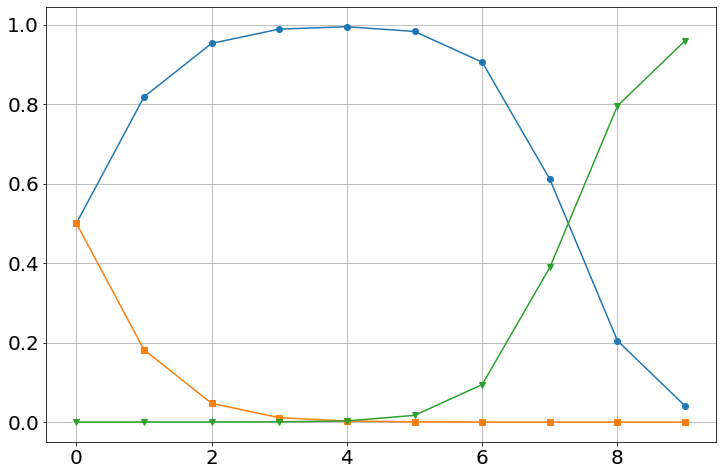

In [10]:
plot(H_posterior,'-o')
plot(L_posterior,'-s')
plot(N_posterior,'-v')

## Flip 9 and 3

data = UUUDUDUUUUUD

9 U, 3 D

So if I flip $N=12$ times then...

In [11]:
def binomial_likelihood(N,D,p):
    from scipy.special import factorial
    return factorial(N)/factorial(N-D)/factorial(D)*p**(D)*(1-p)**(N-D)

> “The p-value is the probability of obtaining test results at least as extreme as the results actually observed, under the assumption that the null hypothesis is correct.” 

In [12]:
binomial_likelihood(12,3,0.5)+binomial_likelihood(12,2,0.5)+binomial_likelihood(12,1,0.5)+binomial_likelihood(12,0,0.5)

0.072998046875

but if I flip until 3 down, then the distribution is the negative binomial

In [13]:
def negbinomial_likelihood(N,D,p):
    from scipy.special import factorial
    return factorial(N-1)/factorial((N-1)-(D-1))/factorial(D-1)*p**(D)*(1-p)**(N-D)

In [14]:
negbinomial_likelihood(12,3,0.5)+negbinomial_likelihood(13,3,0.5)+negbinomial_likelihood(14,3,0.5) # + ....

0.0262451171875

In [15]:
sum([negbinomial_likelihood(_,3,0.5) for _ in range(12,100)])

0.03271484375

In [24]:
models=θ=p_D=linspace(0,1,101)
θ

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [17]:
L=binomial_likelihood(12,3,θ)

Text(0.5, 0, '$p_D$')

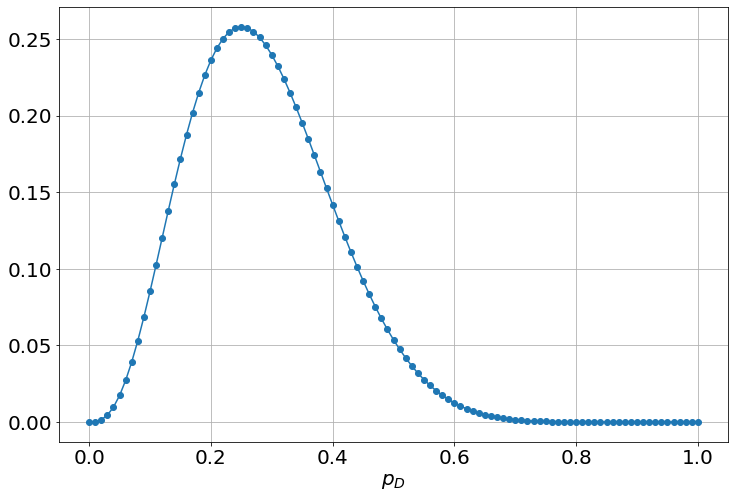

In [18]:
plot(θ,L,'-o')
xlabel('$p_D$')

In [19]:
prior=ones(len(θ))/len(θ)
prior

array([0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990099,
       0.00990099, 0.00990099, 0.00990099, 0.00990099, 0.00990

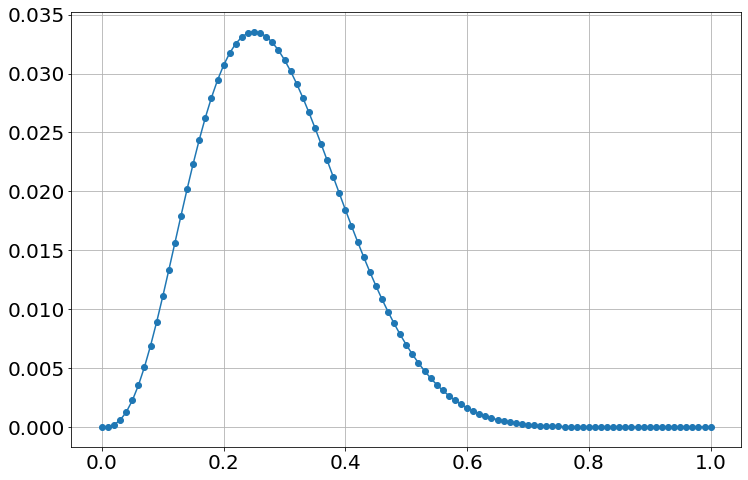

In [32]:
L=binomial_likelihood(12,3,θ)
prior=ones(len(θ))/len(θ)
posterior=prior*L
T=sum(posterior)
posterior/=T
plot(θ,posterior,'-o')

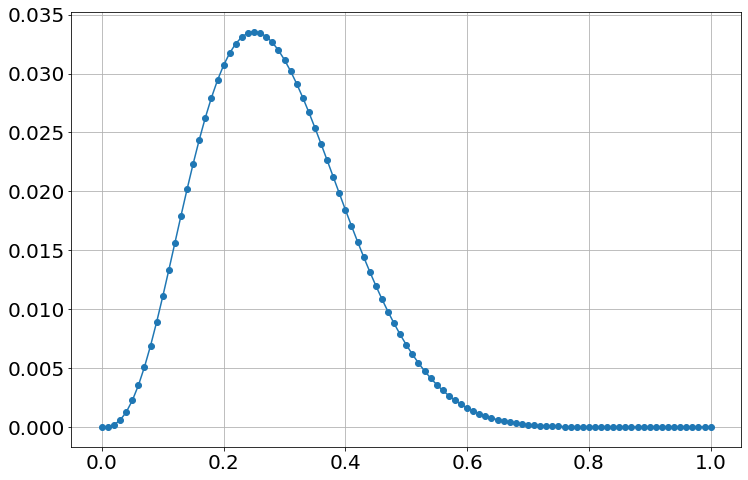

In [33]:
posterior=prior*L
T=sum(posterior)
posterior/=T
plot(θ,posterior,'-o')

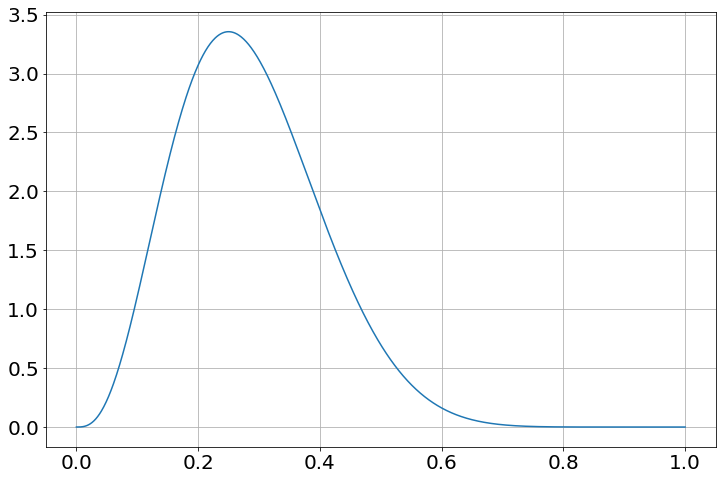

In [34]:
models=θ=p_U=linspace(0,1,1001)
dθ=θ[1]-θ[0]
prior=ones(len(θ))
L=binomial_likelihood(12,3,θ)

posterior=prior*L
T=sum(posterior)*dθ
posterior/=T
plot(θ,posterior,'-')

In [35]:
sum(posterior*dθ)

1.0

In [36]:
sum(posterior[θ<0.5]*dθ)

0.9535076025402637